---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('../../data/processed-data/Normalized_Data_with_Sentiments.csv')


# Specify the feature columns
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]

# Ensure the target column 'popularity' exists in DataFrame
if 'Popularity' not in df.columns:
    raise ValueError("The 'popularity' column is missing from the DataFrame.")

# Split into input (X) and target (y)
X = df[features]  # Inputs
y = df['Popularity']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the test dataset
y_pred = model.predict(X_test)

# Calculate regression model metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 123.52107678768438
R^2 Score: 0.46571217229730644


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('../../data/processed-data/Normalized_Data_with_Sentiments.csv')

# Specify the feature columns
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]

# Ensure the target column 'popularity' exists in DataFrame
if 'Popularity' not in df.columns:
    raise ValueError("The 'popularity' column is missing from the DataFrame.")

# Split into input (X) and target (y)
X = df[features]  # Inputs
y = df['Popularity']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=100)  # Alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)  # Alpha can be adjusted based on the scale of features

# Train the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict using the test dataset
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate regression model metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Linear Regression - Mean Squared Error: {mse_linear}, R^2 Score: {r2_linear}")
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")

Linear Regression - Mean Squared Error: 123.52107678768438, R^2 Score: 0.46571217229730644
Ridge Regression - Mean Squared Error: 125.61840469866303, R^2 Score: 0.4566402243943334
Lasso Regression - Mean Squared Error: 124.26131518891665, R^2 Score: 0.46251028661381044


In [15]:
ridge_coefs = pd.DataFrame({'Feature': features, 'Ridge Coefficient': ridge_model.coef_})
lasso_coefs = pd.DataFrame({'Feature': features, 'Lasso Coefficient': lasso_model.coef_})

print("Ridge Regression Coefficients:")
print(ridge_coefs.sort_values(by='Ridge Coefficient', key=abs, ascending=False))

print("\nLasso Regression Coefficients:")
print(lasso_coefs.sort_values(by='Lasso Coefficient', key=abs, ascending=False))


Ridge Regression Coefficients:
                 Feature  Ridge Coefficient
10     singer_popularity           7.864277
8            genre_label          -2.533908
2             Like Count           1.514866
1             View Count           1.369384
9       singer_followers           1.062839
5             Definition           0.996475
4       Subscriber Count          -0.732904
7       Duration_seconds           0.625260
3          Comment Count           0.576714
0   Days Since Published          -0.258114
6   Mean Sentiment Score           0.222361

Lasso Regression Coefficients:
                 Feature  Lasso Coefficient
10     singer_popularity          12.716727
2             Like Count           2.411741
4       Subscriber Count          -1.724140
1             View Count           1.419154
8            genre_label          -1.207045
6   Mean Sentiment Score           1.096352
5             Definition           0.787223
7       Duration_seconds           0.705463
9       singe

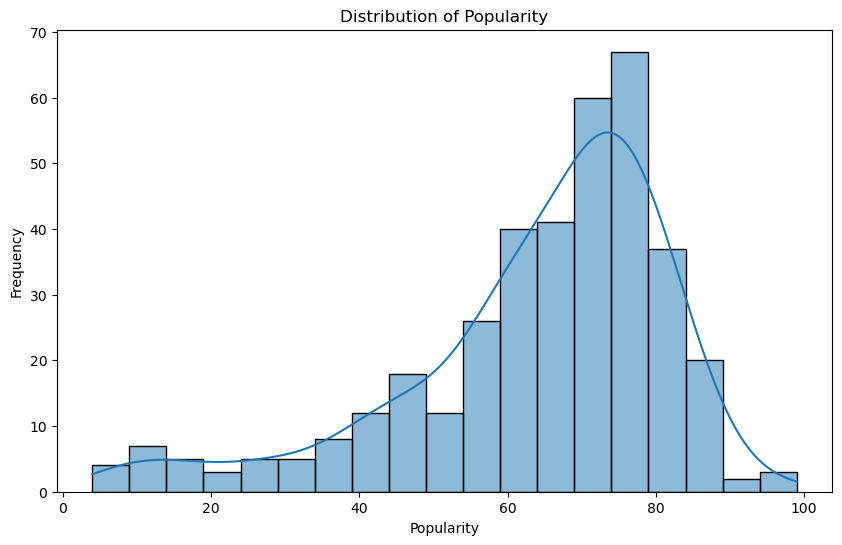

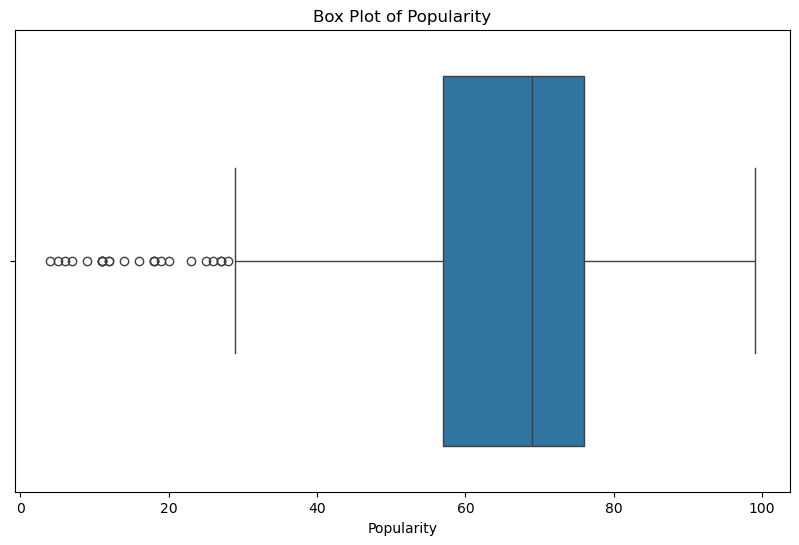

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设定matplotlib的样式
# plt.style.use('seaborn')

# 加载数据
df = pd.read_csv('../../data/processed-data/Normalized_Data_with_Sentiments.csv')

# 检查'Popularity'列是否存在
if 'Popularity' not in df.columns:
    raise ValueError("The 'Popularity' column is missing from the DataFrame.")

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# 绘制箱形图
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Box Plot of Popularity')
plt.xlabel('Popularity')
plt.show()

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Set the threshold for classifying a song as popular
popularity_threshold = df['Popularity'].quantile(0.8)
df['is_popular'] = df['Popularity'] > popularity_threshold

# Define the features and target variable
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]
X = df[features]
y = df['is_popular']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the random under-sampler
rus = RandomUnderSampler(random_state=5100)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Create an instance of Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations to ensure convergence

# Train the model
model.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7733333333333333
Confusion Matrix:
 [[50 15]
 [ 2  8]]
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.77      0.85        65
        True       0.35      0.80      0.48        10

    accuracy                           0.77        75
   macro avg       0.65      0.78      0.67        75
weighted avg       0.88      0.77      0.81        75



In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler  # Ensure to import the necessary module for under-sampling

# Assume df is your DataFrame
# Set the threshold for songs to be considered popular
popularity_threshold = df['Popularity'].quantile(0.8)
df['is_popular'] = df['Popularity'] > popularity_threshold

# Define features and target variable
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]
X = df[features]
y = df['is_popular']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the random under-sampler
rus = RandomUnderSampler(random_state=5100)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the parameter grid to be tested
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 5]
}

# Create an instance of RandomForestClassifier
rf = RandomForestClassifier(random_state=5100)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best parameters model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Output the classification report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_de

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler  # Import the random under-sampling class

# Set the threshold for a song to be considered popular
popularity_threshold = df['Popularity'].quantile(0.8)
df['is_popular'] = df['Popularity'] > popularity_threshold

# Define the features and target variable
features = [
    'Days Since Published', 'View Count', 'Like Count', 'Comment Count',
    'Subscriber Count', 'Definition', 'Mean Sentiment Score',
    'Duration_seconds', 'genre_label', 'singer_followers', 'singer_popularity'
]
X = df[features]
y = df['is_popular']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the random under-sampler
rus = RandomUnderSampler(random_state=5100)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=5100, min_samples_leaf=4, min_samples_split=10, n_estimators=100, max_depth=None)
model.fit(X_resampled, y_resampled)
# model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7066666666666667
Confusion Matrix:
 [[47 18]
 [ 4  6]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.72      0.81        65
        True       0.25      0.60      0.35        10

    accuracy                           0.71        75
   macro avg       0.59      0.66      0.58        75
weighted avg       0.83      0.71      0.75        75

